# Inspect cross-validation results

In [214]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import seaborn as sns

%matplotlib inline

plt.style.use("huddlej")

In [218]:
def matthews_correlation_coefficient(tp, tn, fp, fn):
    """Return Matthews correlation coefficient for values from a confusion matrix.
    Implementation is based on the definition from wikipedia:

    https://en.wikipedia.org/wiki/Matthews_correlation_coefficient
    """
    numerator = (tp * tn) - (fp * fn)
    denominator = np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
    if denominator == 0:
            denominator = 1

    return float(numerator) / denominator

def get_matthews_correlation_coefficient_for_data_frame(freq_df, return_confusion_matrix=False):
        """Calculate Matthew's correlation coefficient from a given pandas data frame
        with columns for initial, observed, and predicted frequencies.
        """
        observed_growth = (freq_df["observed_freq"] > freq_df["initial_freq"])
        predicted_growth = (freq_df["predicted_freq"] > freq_df["initial_freq"])
        true_positives = ((observed_growth) & (predicted_growth)).sum()
        false_positives= ((~observed_growth) & (predicted_growth)).sum()

        observed_decline = (freq_df["observed_freq"] <= freq_df["initial_freq"])
        predicted_decline = (freq_df["predicted_freq"] <= freq_df["initial_freq"])
        true_negatives = ((observed_decline) & (predicted_decline)).sum()
        false_negatives = ((~observed_decline) & (predicted_decline)).sum()

        mcc = matthews_correlation_coefficient(
            true_positives,
            true_negatives,
            false_positives,
            false_negatives
        )

        if return_confusion_matrix:
            confusion_matrix = {
                "tp": true_positives,
                "tn": true_negatives,
                "fp": false_positives,
                "fn": false_negatives
            }

            return mcc, confusion_matrix
        else:
            return mcc

def accuracy(tp, tn, fp, fn):
    return (tp + tn) / float(tp + tn + fp + fn)

In [182]:
df = pd.read_table("model_validation.tab", keep_default_na=False, na_values="N/A")

In [183]:
df.head()

,fn,fp,last_training_timepoint,n_samples,parameter-cTiterSub,parameter-dms,parameter-ep,parameter-ep_x,parameter-lbi,parameter-ne,...,test_timepoint,testing_accuracy,testing_correlation,tn,tp,training_accuracy,training_correlation,training_windows,viruses,year_range
0,0,2,2011.25,3,NaN,NaN,NaN,NaN,NaN,NaN,...,2012.25,0.0,NaN,0,1,-0.019562,0.032837,9,92,2006-2018
1,0,16,2011.75,17,NaN,NaN,NaN,NaN,NaN,NaN,...,2012.75,0.0,-0.169651,0,1,-0.089838,0.044232,10,92,2006-2018
2,0,10,2012.25,12,NaN,NaN,NaN,NaN,NaN,NaN,...,2013.25,0.0,-0.073367,0,2,-0.081786,0.042378,11,92,2006-2018
3,0,1,2012.75,3,NaN,NaN,NaN,NaN,NaN,NaN,...,2013.75,0.0,NaN,0,2,-0.088273,0.016135,12,92,2006-2018
4,0,21,2013.25,24,NaN,NaN,NaN,NaN,NaN,NaN,...,2014.25,0.0,-0.129709,0,3,-0.080249,0.000197,13,92,2006-2018


In [184]:
df.shape

(88, 26)

In [185]:
df.columns

Index([u'fn', u'fp', u'last_training_timepoint', u'n_samples',
       u'parameter-cTiterSub', u'parameter-dms', u'parameter-ep',
       u'parameter-ep_x', u'parameter-lbi', u'parameter-ne',
       u'parameter-ne_star', u'parameter-null', u'predictors', u'sae',
       u'sample', u'sse', u'test_timepoint', u'testing_accuracy',
       u'testing_correlation', u'tn', u'tp', u'training_accuracy',
       u'training_correlation', u'training_windows', u'viruses',
       u'year_range'],
      dtype='object')

In [186]:
df.head()

,fn,fp,last_training_timepoint,n_samples,parameter-cTiterSub,parameter-dms,parameter-ep,parameter-ep_x,parameter-lbi,parameter-ne,...,test_timepoint,testing_accuracy,testing_correlation,tn,tp,training_accuracy,training_correlation,training_windows,viruses,year_range
0,0,2,2011.25,3,NaN,NaN,NaN,NaN,NaN,NaN,...,2012.25,0.0,NaN,0,1,-0.019562,0.032837,9,92,2006-2018
1,0,16,2011.75,17,NaN,NaN,NaN,NaN,NaN,NaN,...,2012.75,0.0,-0.169651,0,1,-0.089838,0.044232,10,92,2006-2018
2,0,10,2012.25,12,NaN,NaN,NaN,NaN,NaN,NaN,...,2013.25,0.0,-0.073367,0,2,-0.081786,0.042378,11,92,2006-2018
3,0,1,2012.75,3,NaN,NaN,NaN,NaN,NaN,NaN,...,2013.75,0.0,NaN,0,2,-0.088273,0.016135,12,92,2006-2018
4,0,21,2013.25,24,NaN,NaN,NaN,NaN,NaN,NaN,...,2014.25,0.0,-0.129709,0,3,-0.080249,0.000197,13,92,2006-2018


In [187]:
agg_functions = ["mean", "std"]
np.around(df.groupby("predictors").aggregate({
    "testing_accuracy": agg_functions,
    "sse": agg_functions,
    "testing_correlation": agg_functions
}).sort_values([("sse", "mean")]), 3)

testing_accuracy           sse        testing_correlation       
                       mean    std   mean    std                mean    std
predictors                                                                 
lbi                   0.449  0.389  0.217  0.232               0.506  0.345
cTiterSub             0.342  0.427  0.234  0.235               0.439  0.397
ep_x                 -0.089  0.483  0.279  0.237               0.044  0.406
dms                   0.067  0.413  0.280  0.231               0.130  0.323
null                  0.000  0.000  0.281  0.239              -0.140  0.174
ne                   -0.203  0.415  0.283  0.237              -0.166  0.388
ne_star               0.150  0.406  0.289  0.245               0.179  0.352
ep                   -0.170  0.286  0.304  0.255              -0.226  0.223

In [188]:
error_df = df.groupby("predictors").aggregate({"sse": "sum", "sae": "sum", "n_samples": "sum"})

In [189]:
# Calculate mean squared error.
mse = (error_df["sse"] / error_df["n_samples"]).sort_values()
mse

predictors
lbi          0.017968
cTiterSub    0.019366
ep_x         0.023085
dms          0.023145
null         0.023280
ne           0.023373
ne_star      0.023939
ep           0.025164
dtype: float64

In [190]:
mse_df = mse.reset_index().rename({0: "mse"}, axis=1)
mse_df

,predictors,mse
0,lbi,0.017968
1,cTiterSub,0.019366
2,ep_x,0.023085
3,dms,0.023145
4,null,0.023280
5,ne,0.023373
6,ne_star,0.023939
7,ep,0.025164


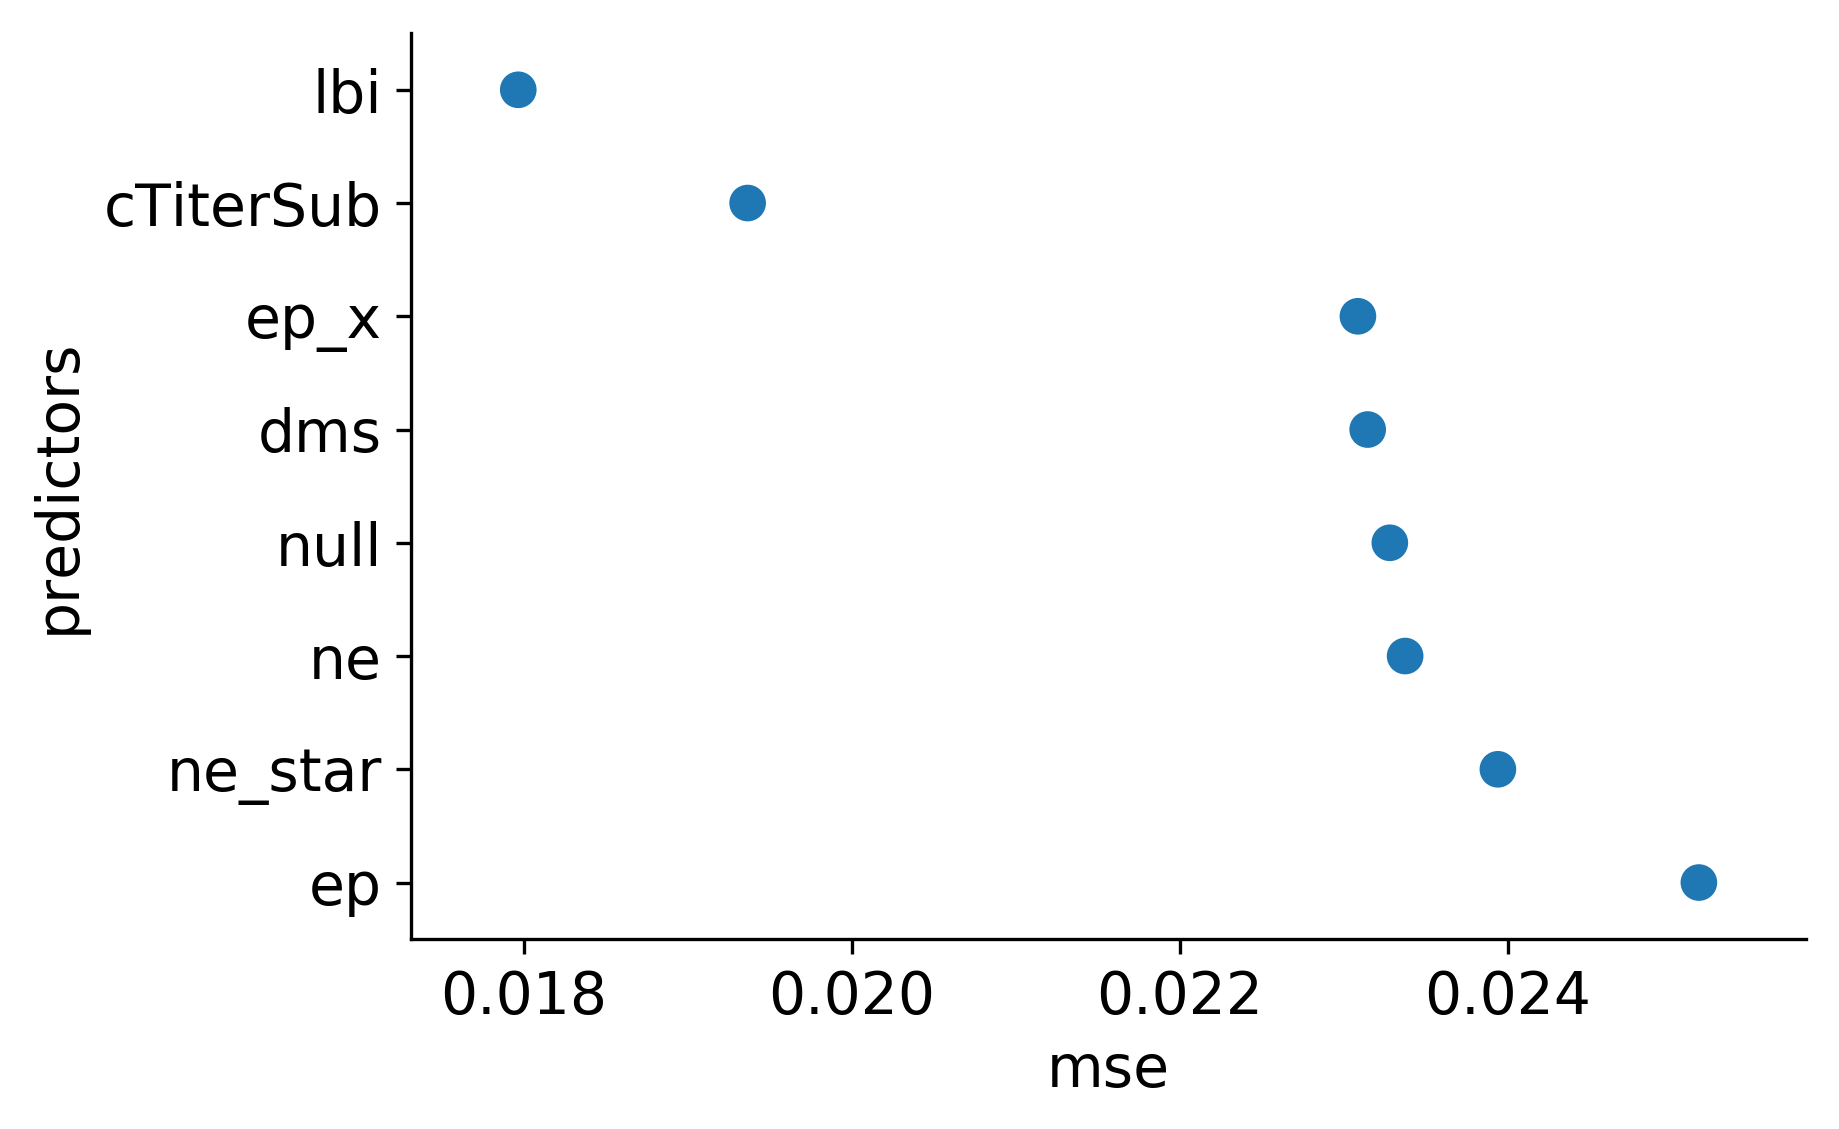

In [191]:
sns.pointplot(
    x="mse",
    y="predictors",
    data=mse_df,
    join=False
)

In [192]:
# Calculate mean absolute error
mae = (error_df["sae"] / error_df["n_samples"]).sort_values()
mae

predictors
lbi          0.058330
cTiterSub    0.060555
null         0.067683
dms          0.068011
ne           0.068616
ep_x         0.068869
ne_star      0.069533
ep           0.069937
dtype: float64

In [193]:
mae_df = mae.reset_index().rename({0: "mae"}, axis=1)
mae_df

,predictors,mae
0,lbi,0.058330
1,cTiterSub,0.060555
2,null,0.067683
3,dms,0.068011
4,ne,0.068616
5,ep_x,0.068869
6,ne_star,0.069533
7,ep,0.069937


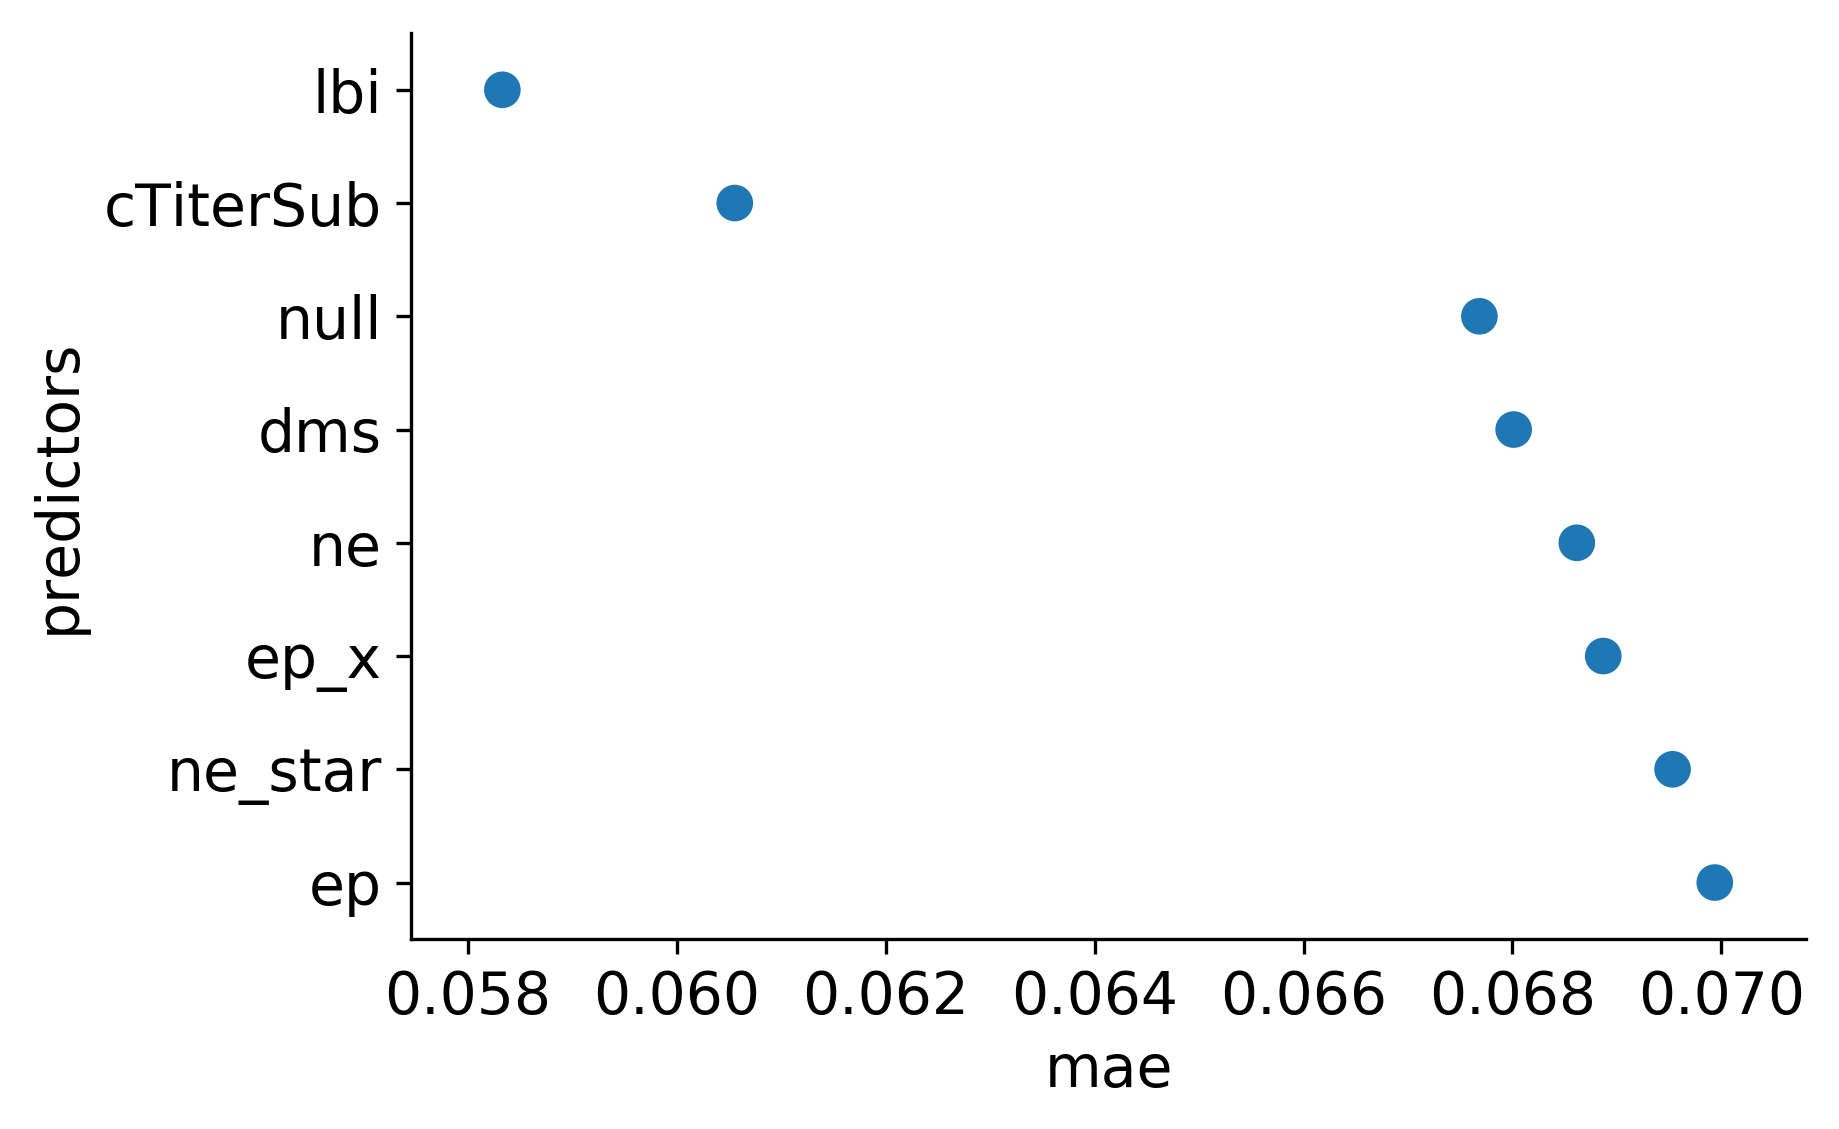

In [194]:
sns.pointplot(
    x="mae",
    y="predictors",
    data=mae_df,
    join=False
)

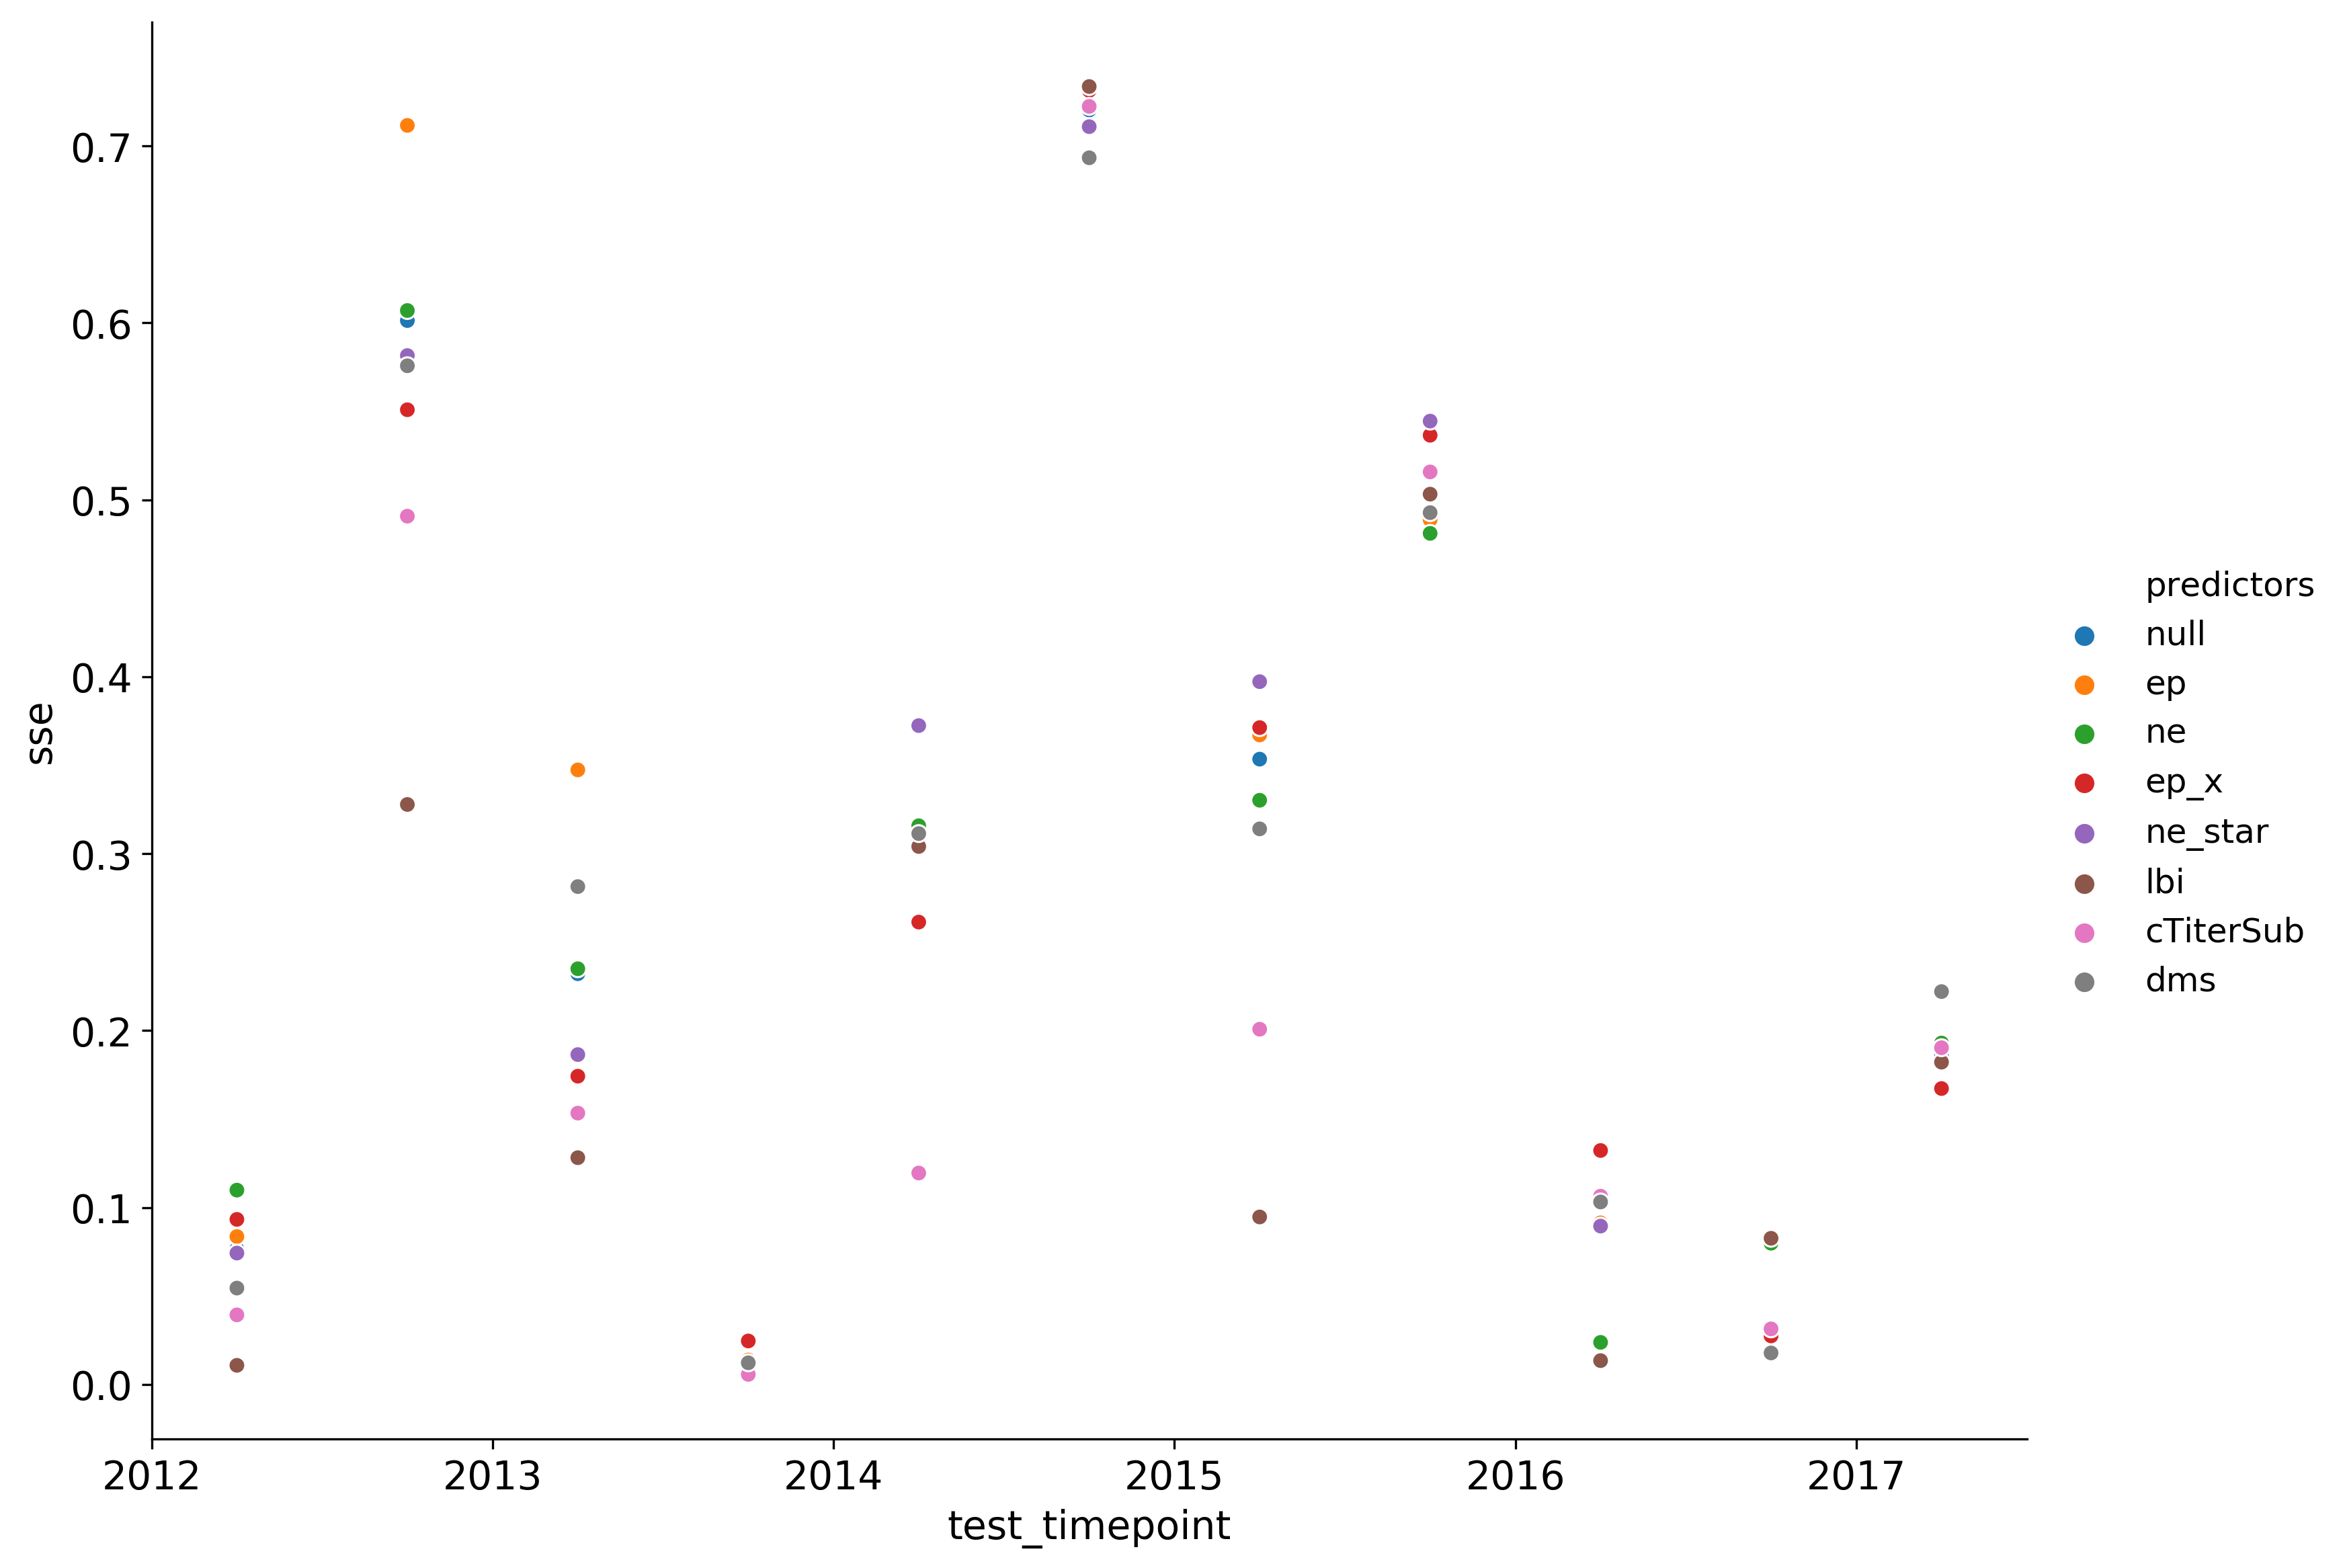

In [195]:
g = sns.relplot(
    "test_timepoint",
    "sse",
    hue="predictors",
    data=df,
    height=8,
    aspect=1.3,
    kind="scatter"
)
#for ax in g.axes.flatten():
#    ax.set_xlim(df["test_timepoint"].min() - 1, df["test_timepoint"].max() + 1)

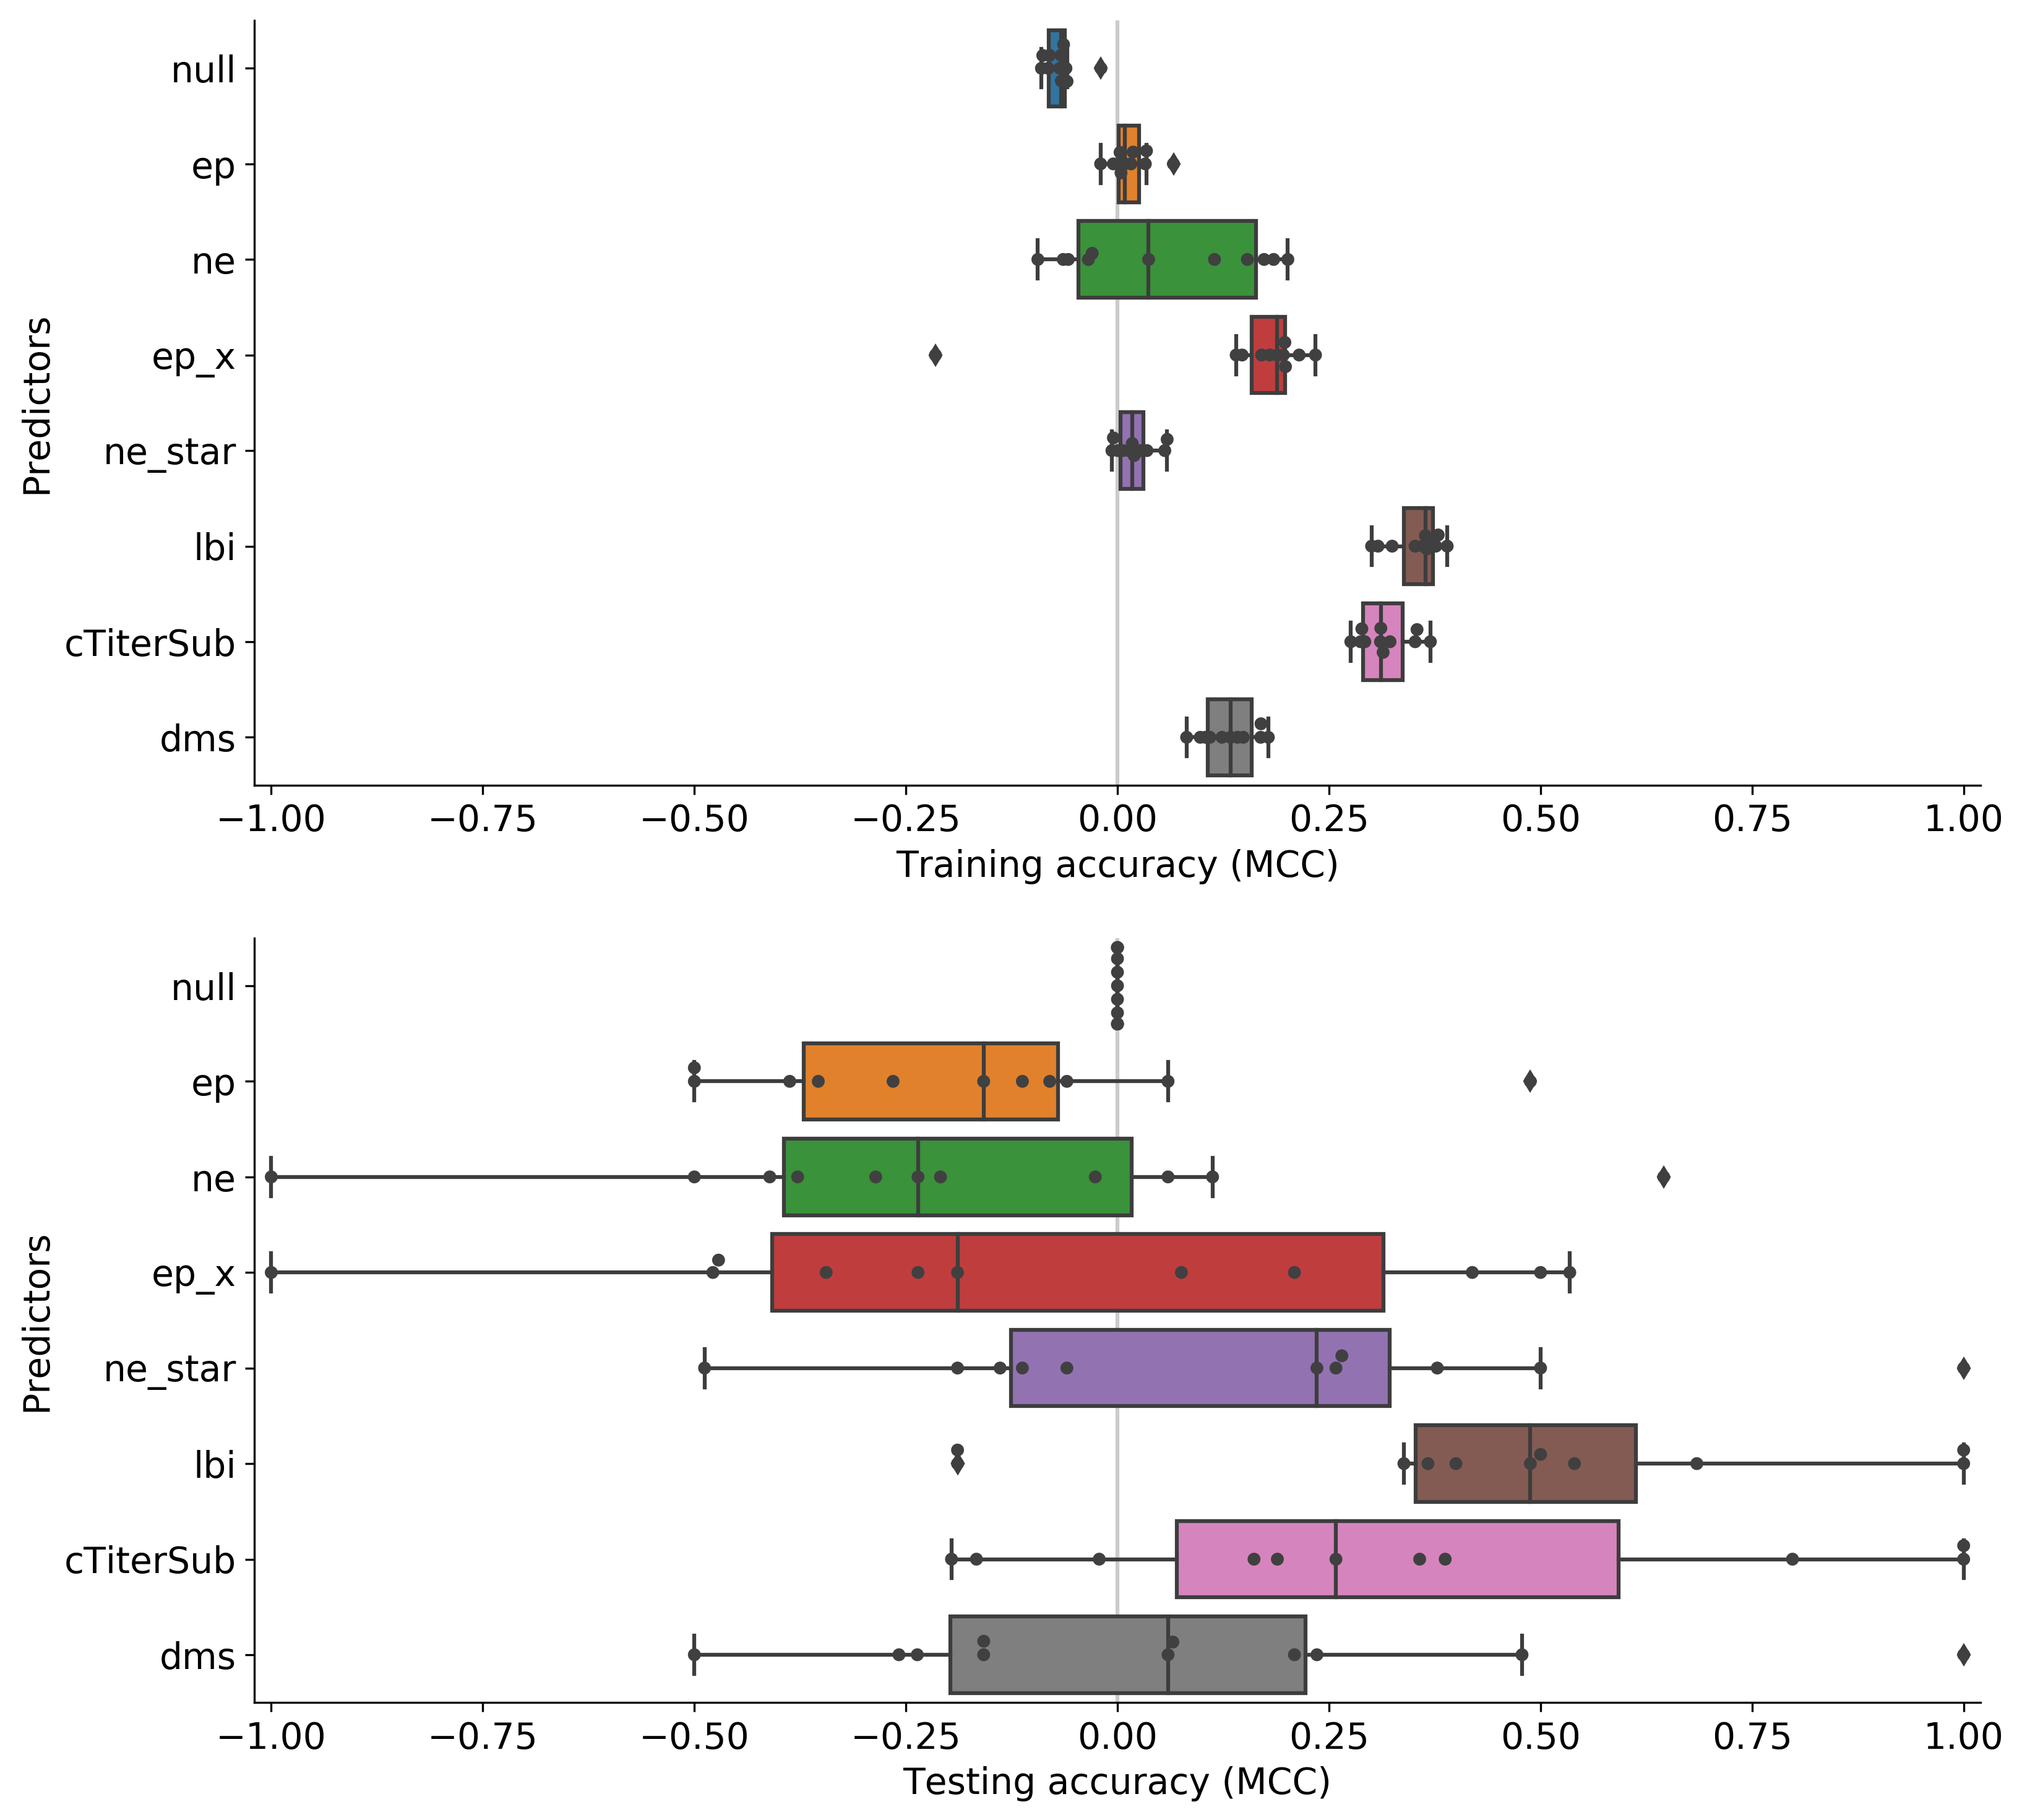

In [196]:
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# Plot training accuracy on the top panel.
sns.boxplot(
    y="predictors",
    x="training_accuracy",
    data=df,
    ax=axes[0]
)
sns.swarmplot(
    y="predictors",
    x="training_accuracy",
    data=df,
    ax=axes[0],
    color="0.25"
)

axes[0].set_xlabel("Training accuracy (MCC)")
axes[0].set_ylabel("Predictors")
axes[0].axvline(0, color="#999999", alpha=0.5, zorder=-10)
axes[0].set_xlim(-1.02, 1.02)

# Plot testing accuracy on the bottom panel.
sns.boxplot(
    y="predictors",
    x="testing_accuracy",
    data=df,
    ax=axes[1]
)
sns.swarmplot(
    y="predictors",
    x="testing_accuracy",
    data=df,
    ax=axes[1],
    color="0.25"
)

axes[1].set_xlabel("Testing accuracy (MCC)")
axes[1].set_ylabel("Predictors")
axes[1].axvline(0, color="#999999", alpha=0.5, zorder=-10)
axes[1].set_xlim(-1.02, 1.02)

sns.despine()

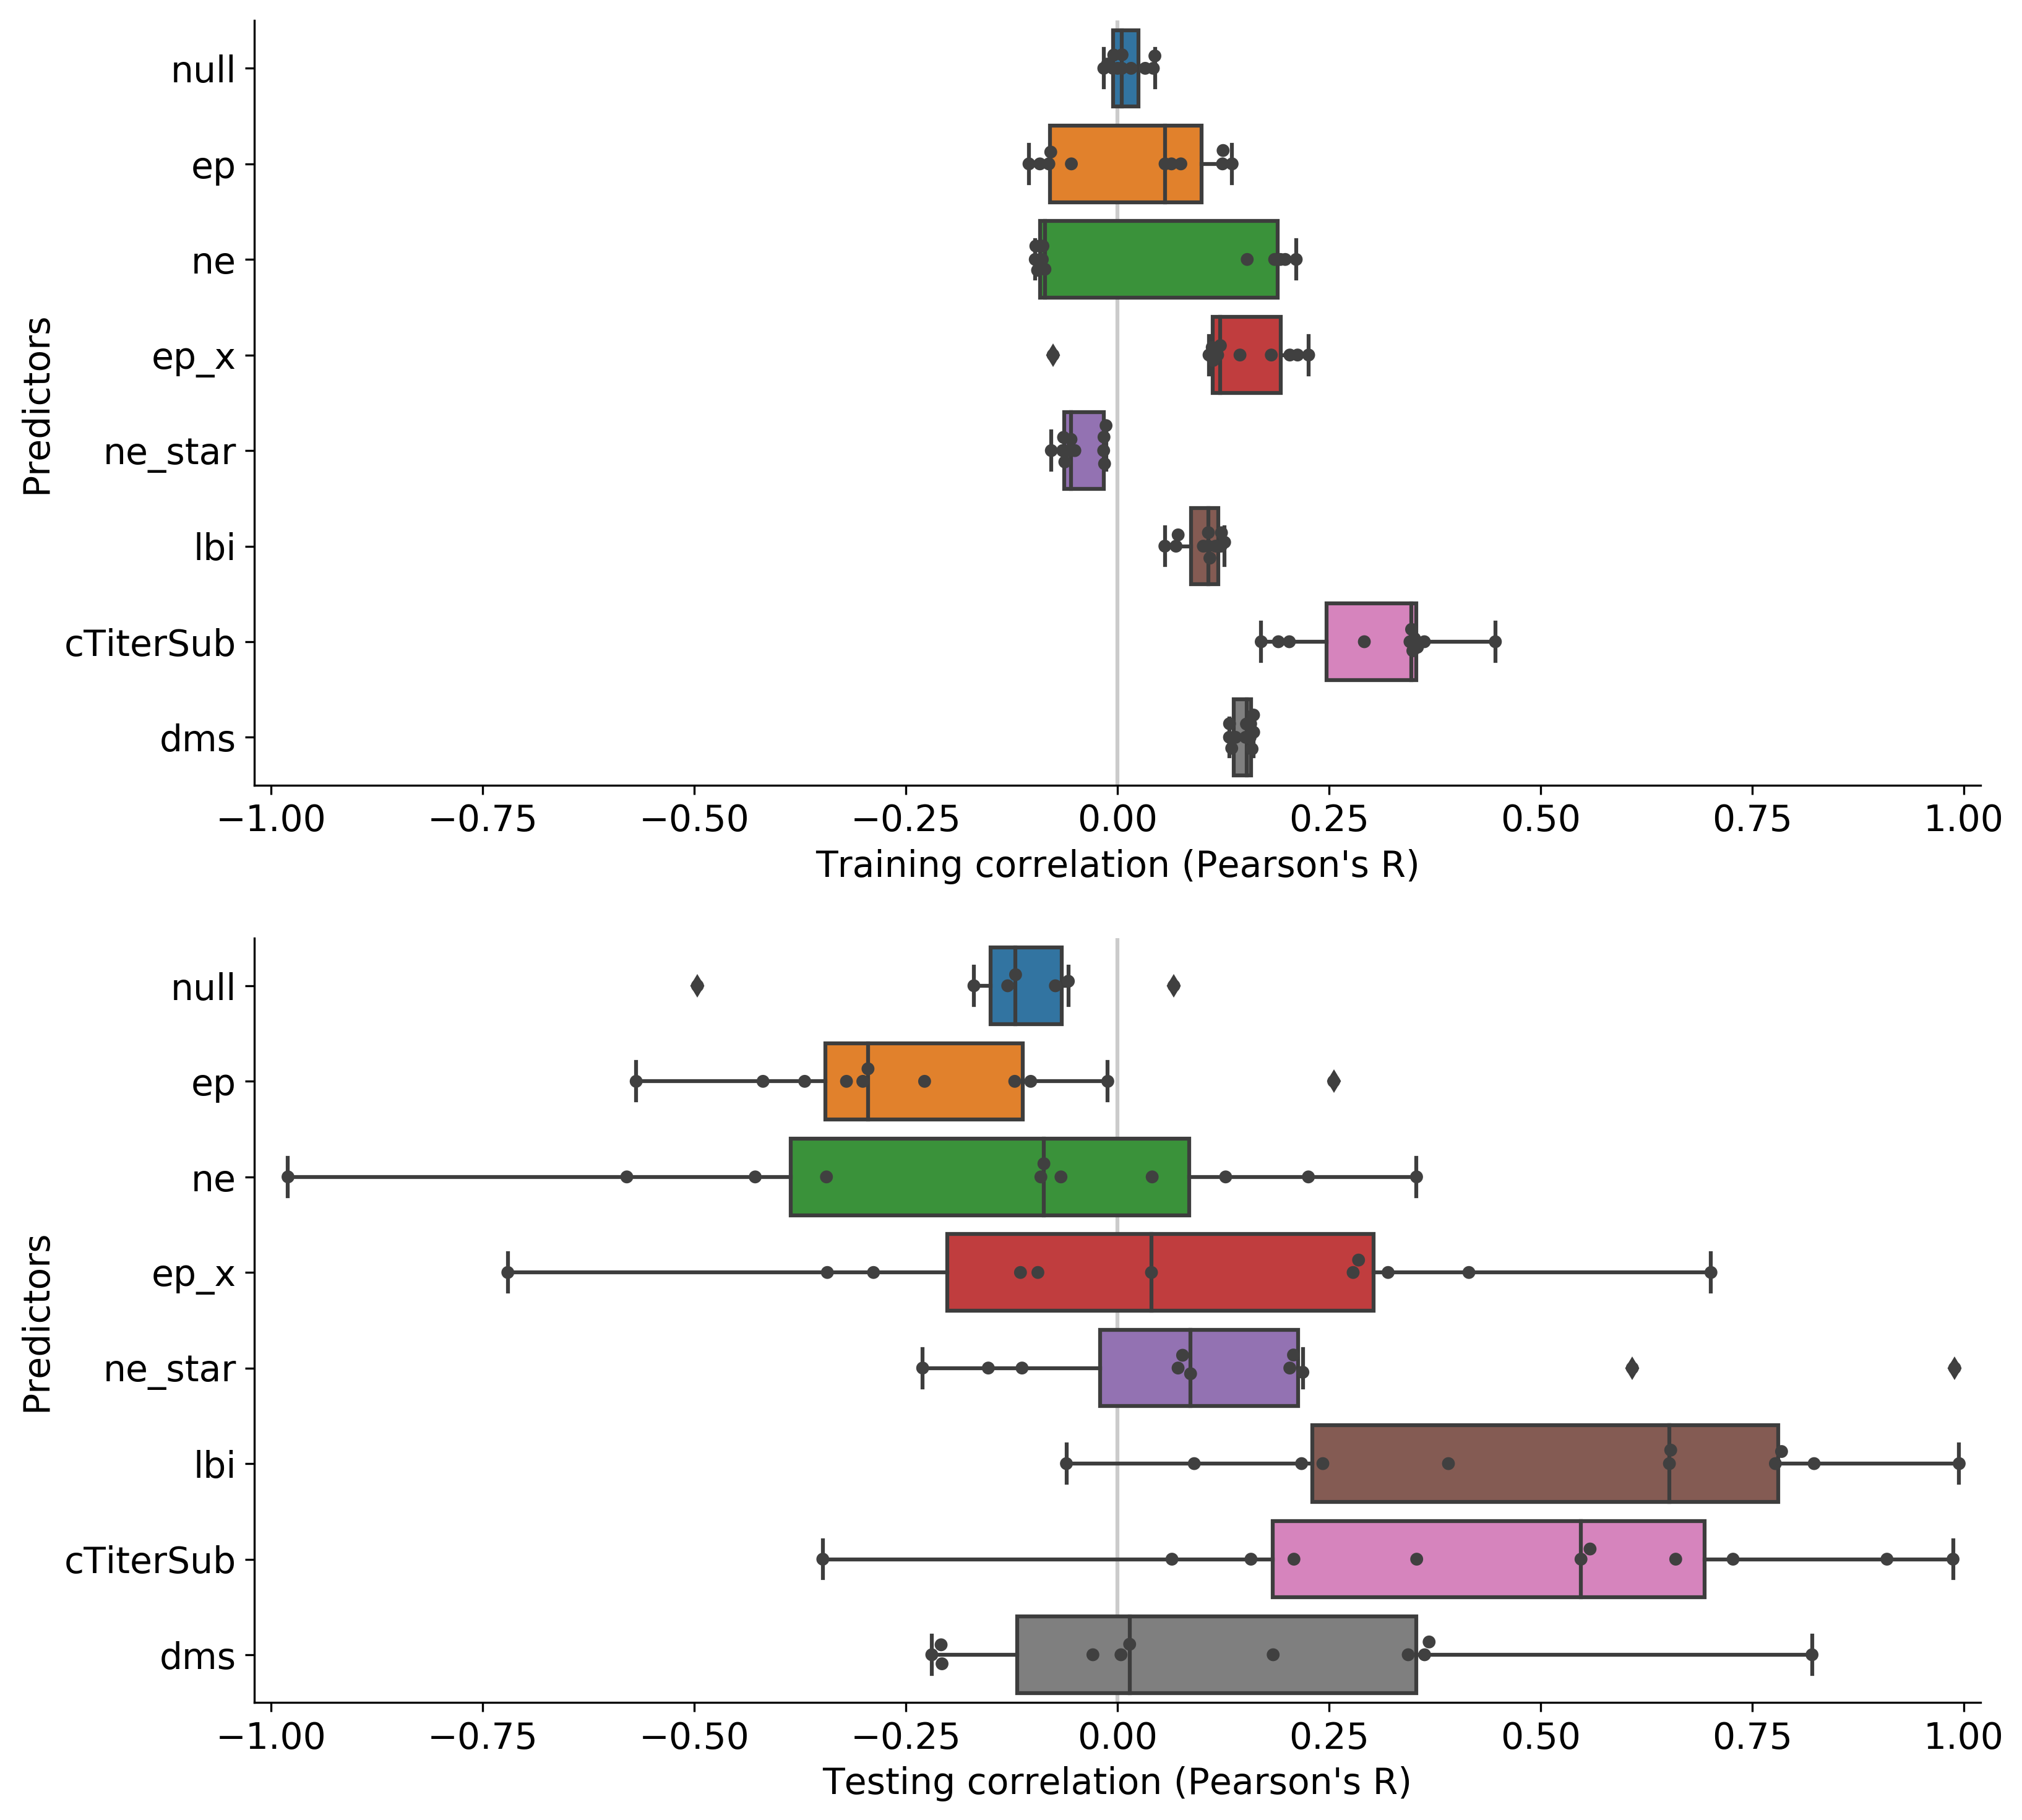

In [197]:
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# Plot training correlation on the top panel.
sns.boxplot(
    y="predictors",
    x="training_correlation",
    data=df,
    ax=axes[0]
)
sns.swarmplot(
    y="predictors",
    x="training_correlation",
    data=df,
    ax=axes[0],
    color="0.25"
)

axes[0].set_xlabel("Training correlation (Pearson's R)")
axes[0].set_ylabel("Predictors")
axes[0].axvline(0, color="#999999", alpha=0.5, zorder=-10)
axes[0].set_xlim(-1.02, 1.02)

# Plot testing correlation on the bottom panel.
sns.boxplot(
    y="predictors",
    x="testing_correlation",
    data=df,
    ax=axes[1]
)
sns.swarmplot(
    y="predictors",
    x="testing_correlation",
    data=df,
    ax=axes[1],
    color="0.25"
)

axes[1].set_xlabel("Testing correlation (Pearson's R)")
axes[1].set_ylabel("Predictors")
axes[1].axvline(0, color="#999999", alpha=0.5, zorder=-10)
axes[1].set_xlim(-1.02, 1.02)

sns.despine()

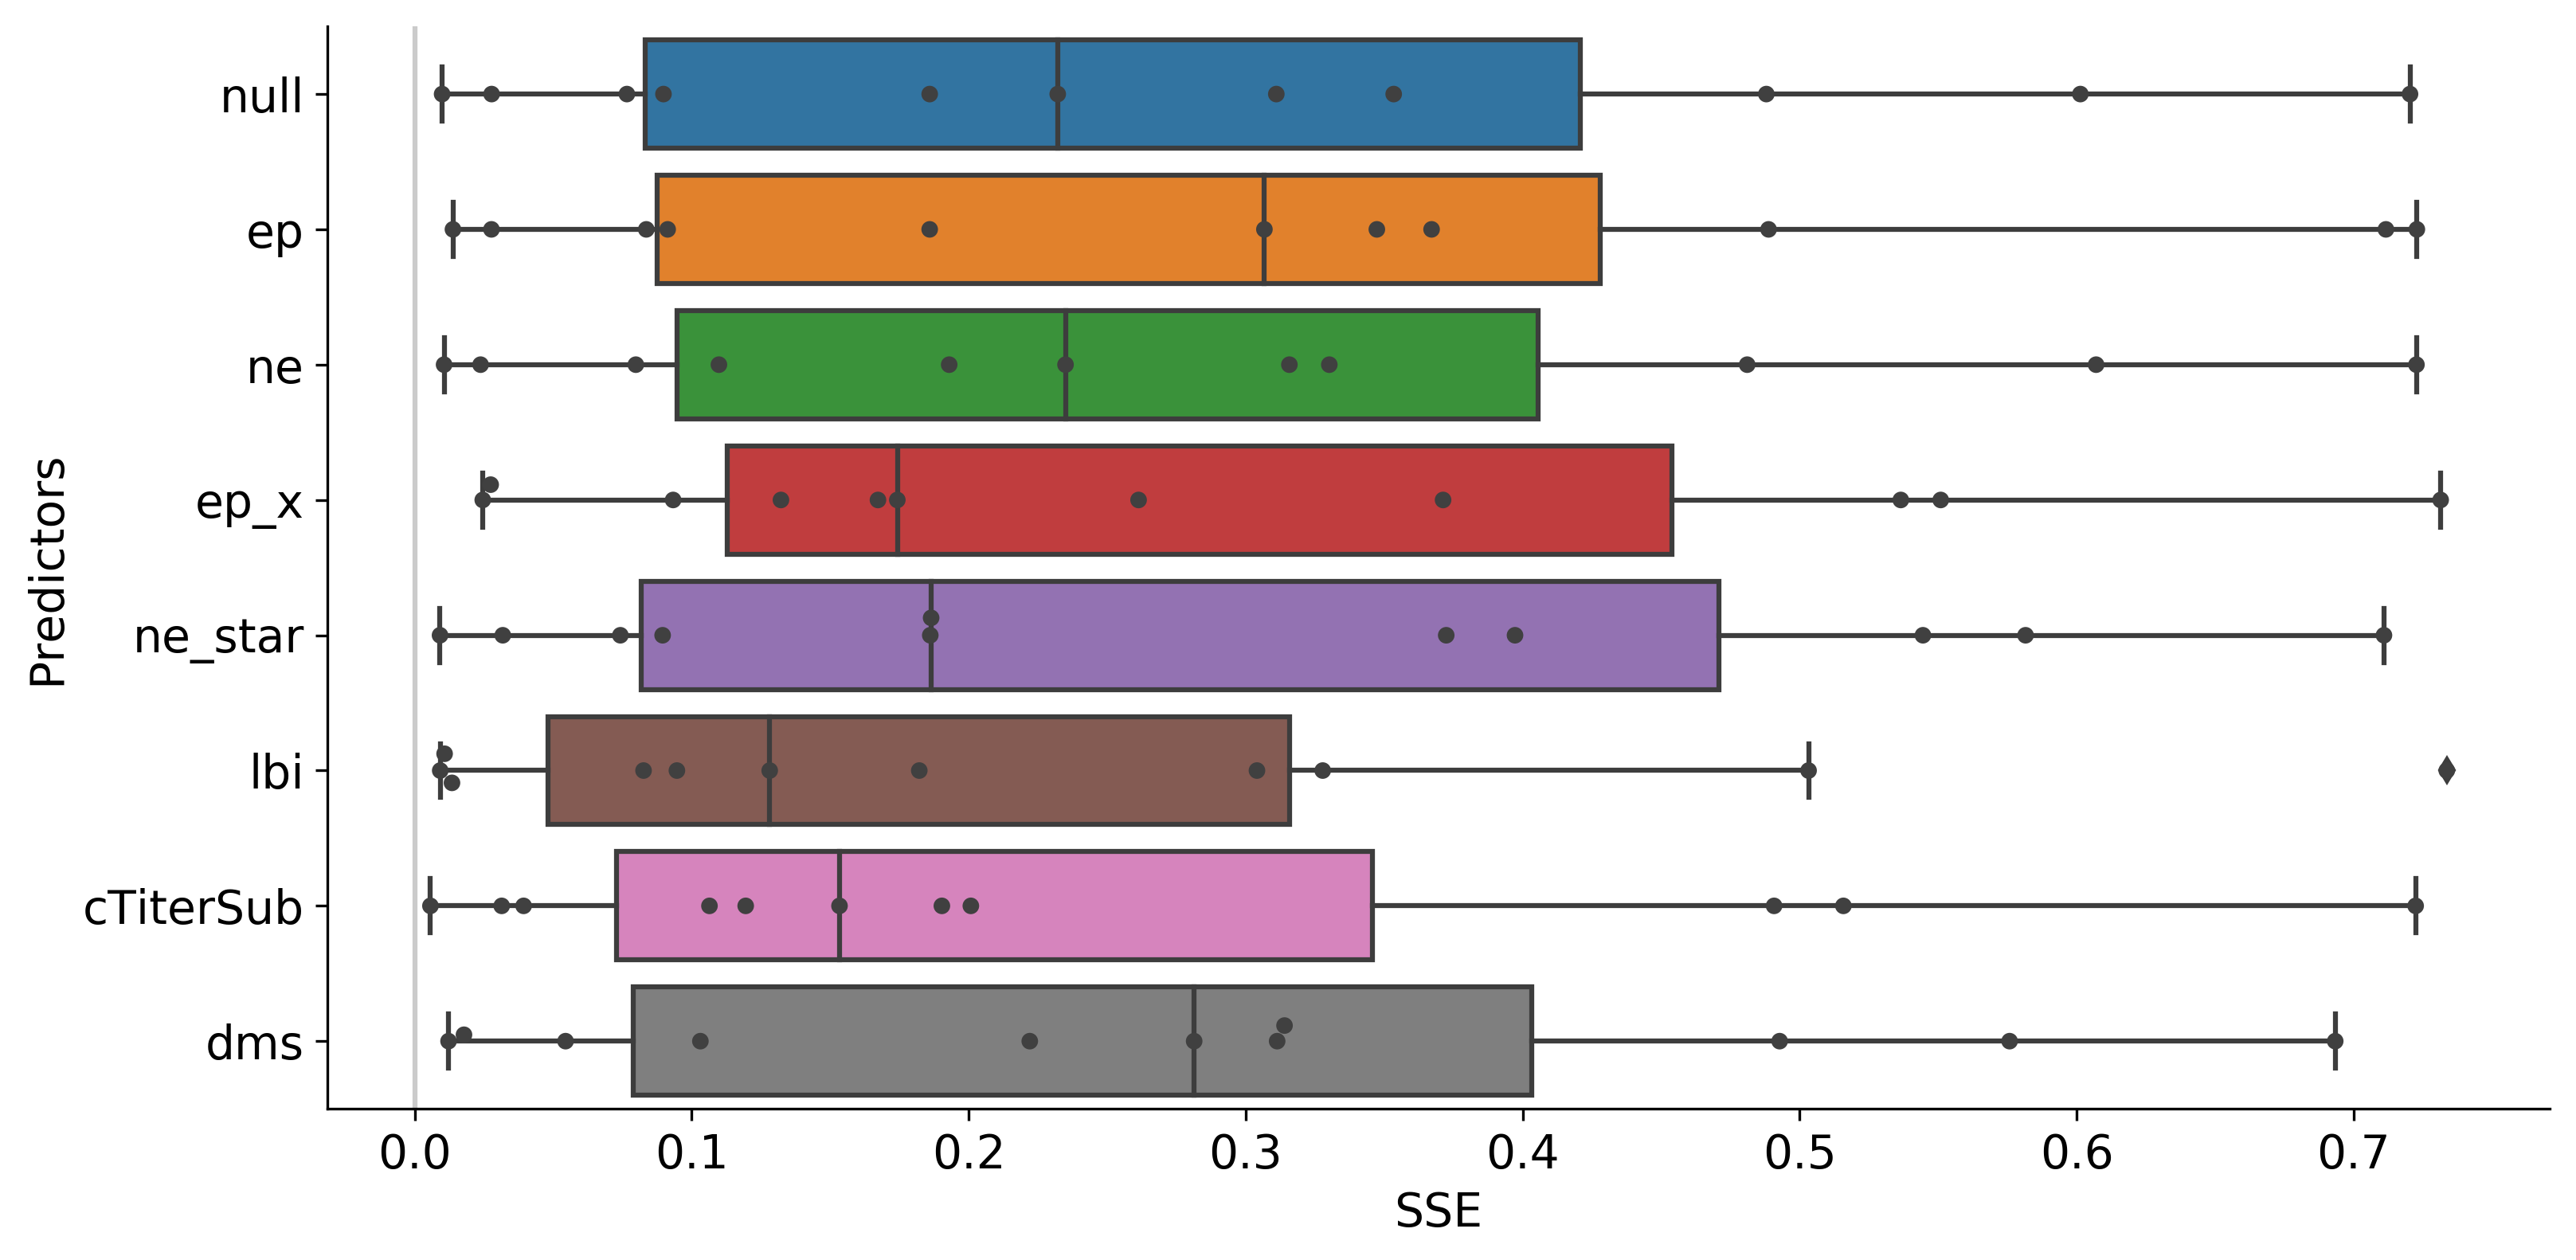

In [198]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

# Plot training accuracy on the top panel.
sns.boxplot(
    y="predictors",
    x="sse",
    data=df,
    ax=ax
)
sns.swarmplot(
    y="predictors",
    x="sse",
    data=df,
    ax=ax,
    color="0.25"
)

ax.set_xlabel("SSE")
ax.set_ylabel("Predictors")
ax.axvline(0, color="#999999", alpha=0.5, zorder=-10)

sns.despine()

In [199]:
df["predictors"].unique()

array(['null', 'ep', 'ne', 'ep_x', 'ne_star', 'lbi', 'cTiterSub', 'dms'], dtype=object)

In [200]:
parameter_columns = [column for column in df.columns if column.startswith("parameter-")]
df.loc[:, ["predictors"] + parameter_columns].groupby("predictors").aggregate(["mean", "std"])

parameter-cTiterSub           parameter-dms           parameter-ep  \
                          mean       std          mean       std         mean   
predictors                                                                      
cTiterSub              0.64129  0.295741           NaN       NaN          NaN   
dms                        NaN       NaN      0.361681  0.017919          NaN   
ep                         NaN       NaN           NaN       NaN    -0.054421   
ep_x                       NaN       NaN           NaN       NaN          NaN   
lbi                        NaN       NaN           NaN       NaN          NaN   
ne                         NaN       NaN           NaN       NaN          NaN   
ne_star                    NaN       NaN           NaN       NaN          NaN   
null                       NaN       NaN           NaN       NaN          NaN   

                     parameter-ep_x           parameter-lbi            \
                 std           mean       std          mean       std   
predictors                                                              
cTiterSub        NaN            NaN       NaN           NaN       NaN   
dms              NaN            NaN       NaN           NaN       NaN   
ep          0.147166            NaN       NaN           NaN       NaN   
ep_x             NaN       0.969271  0.640872           NaN       NaN   
lbi              NaN            NaN       NaN      0.552572  0.115083   
ne               NaN            NaN       NaN           NaN       NaN   
ne_star          NaN            NaN       NaN           NaN       NaN   
null             NaN            NaN       NaN           NaN       NaN   

           parameter-ne           parameter-ne_star           parameter-null  \
                   mean       std              mean       std           mean   
predictors                                                                     
cTiterSub           NaN       NaN               NaN       NaN            NaN   
dms                 NaN       NaN               NaN       NaN            NaN   
ep                  NaN       NaN               NaN       NaN            NaN   
ep_x                NaN       NaN               NaN       NaN            NaN   
lbi                 NaN       NaN               NaN       NaN            NaN   
ne              0.10822  0.295661               NaN       NaN            NaN   
ne_star             NaN       NaN         -1.860784  0.618524            NaN   
null                NaN       NaN               NaN       NaN            0.0   

                 
            std  
predictors       
cTiterSub   NaN  
dms         NaN  
ep          NaN  
ep_x        NaN  
lbi         NaN  
ne          NaN  
ne_star     NaN  
null        0.0

In [201]:
parameters_df = df.loc[:, ["predictors"] + parameter_columns].melt(
    "predictors",
    parameter_columns,
    var_name="predictor",
    value_name="parameter"
).dropna().copy()

In [202]:
parameters_df["predictor"] = parameters_df["predictor"].str.replace("parameter-", "")

In [203]:
parameters_df.head()

,predictors,predictor,parameter
66,cTiterSub,cTiterSub,0.180379
67,cTiterSub,cTiterSub,0.220432
68,cTiterSub,cTiterSub,0.266589
69,cTiterSub,cTiterSub,0.533249
70,cTiterSub,cTiterSub,0.711127


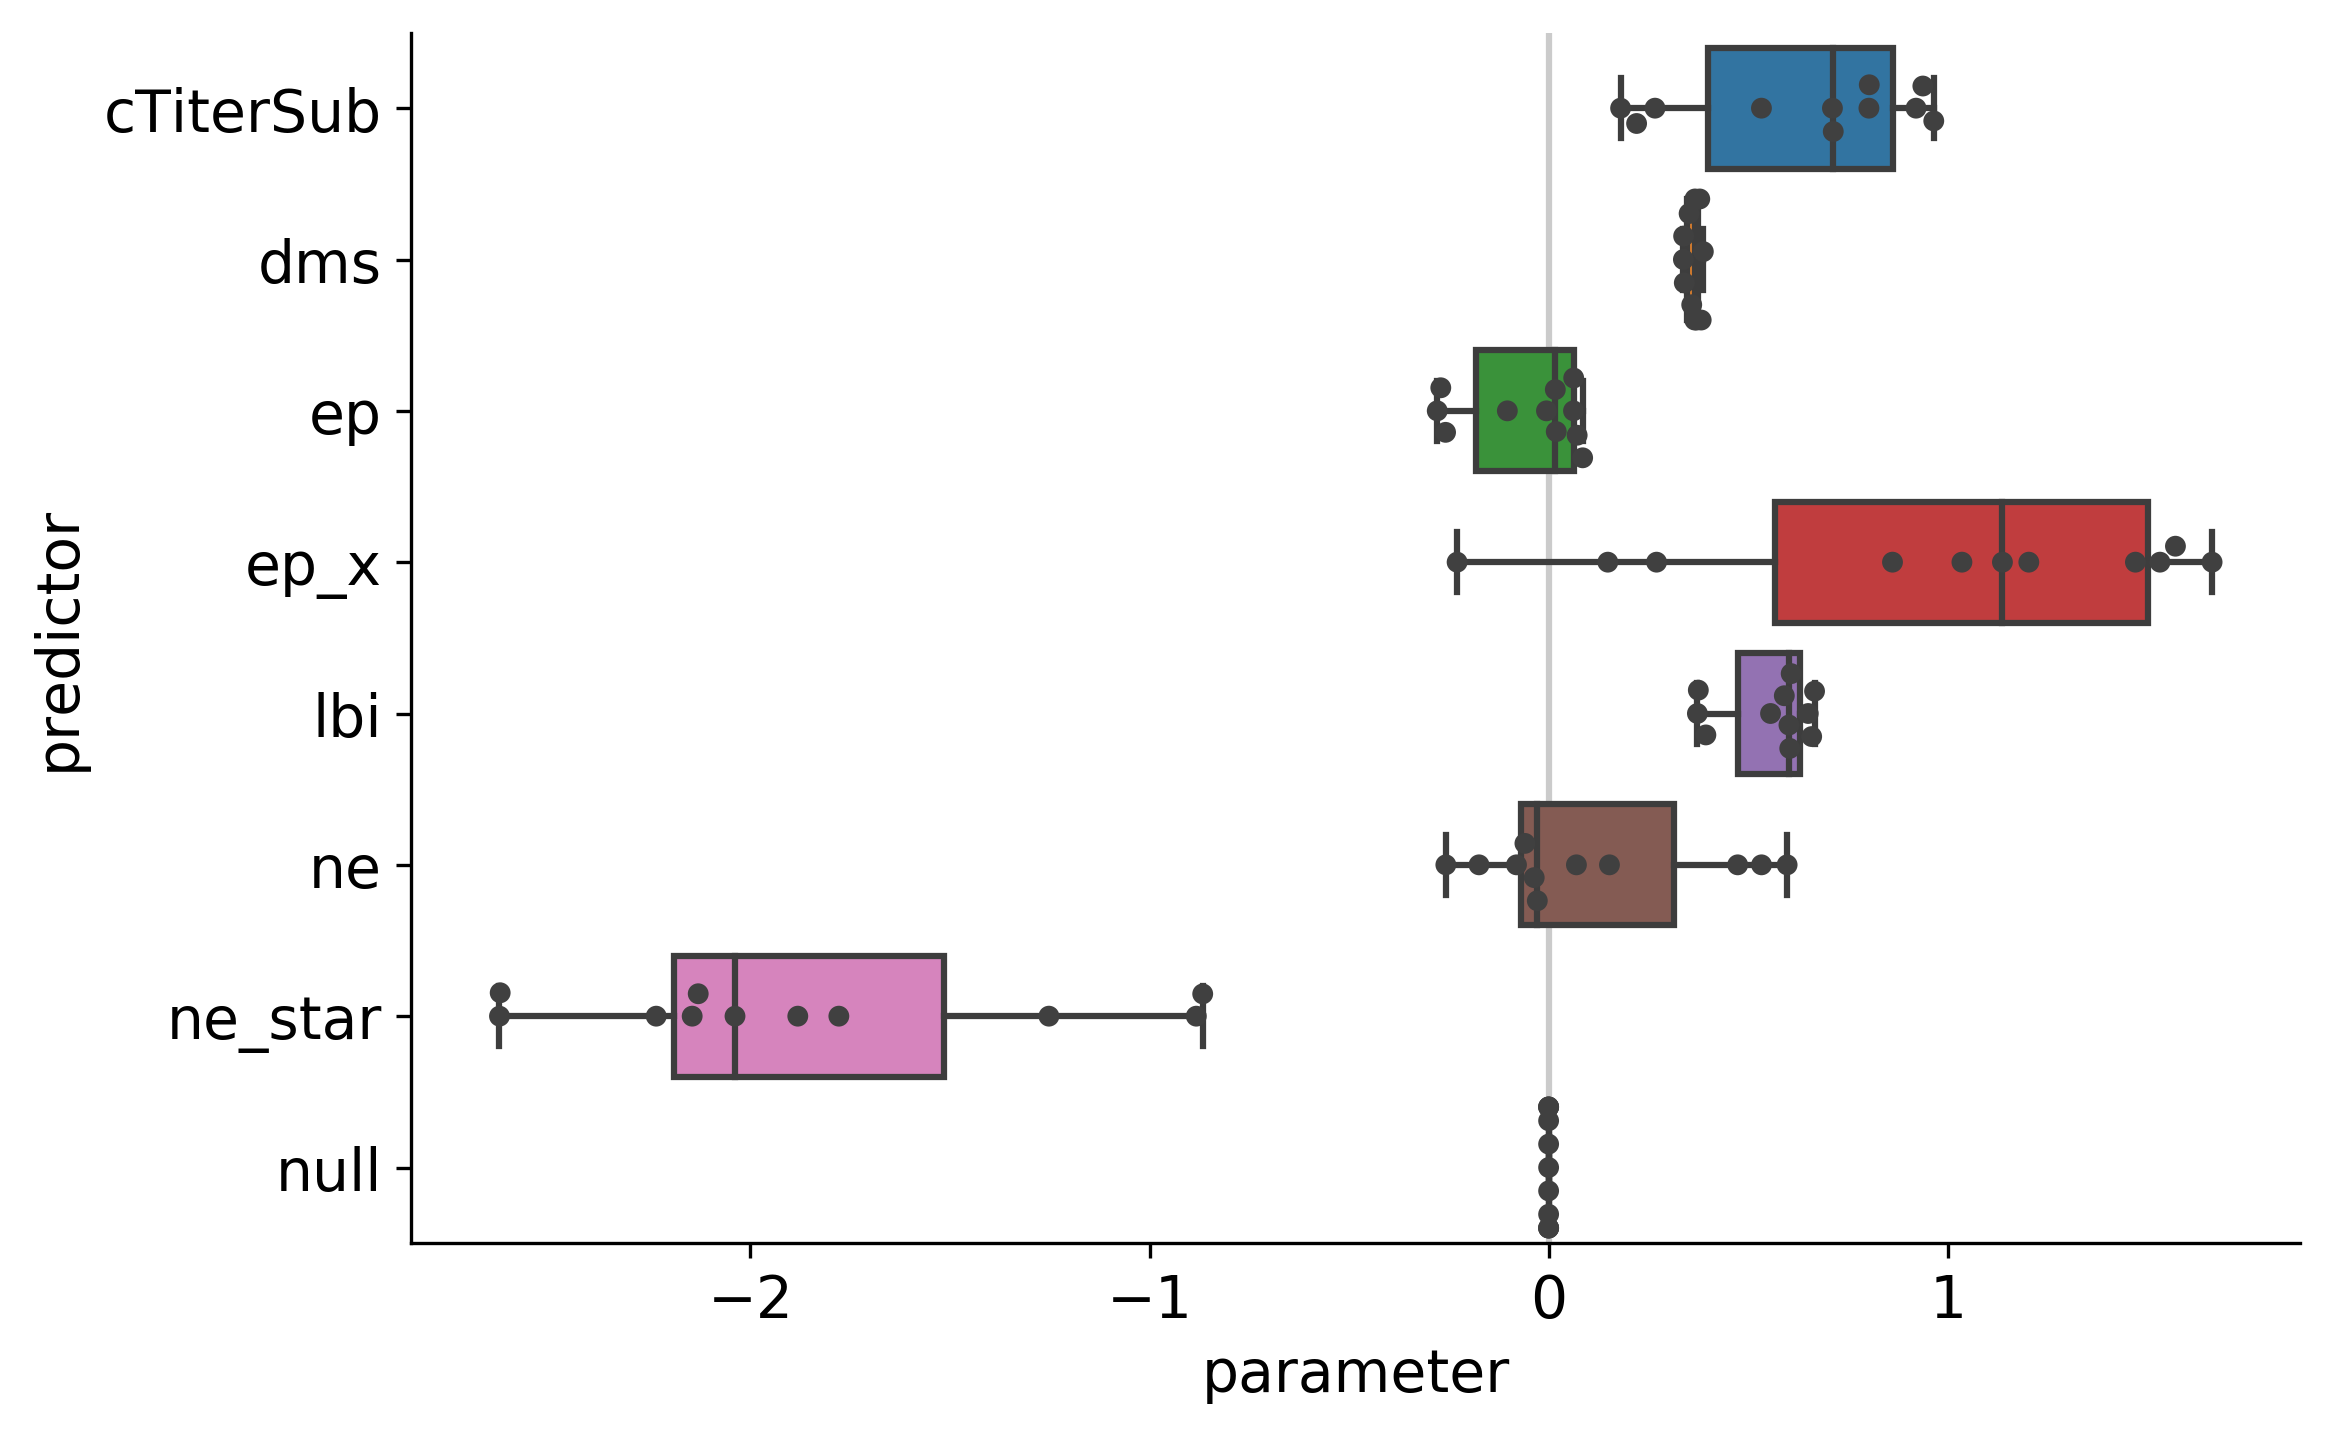

In [204]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
sns.boxplot(
    y="predictor",
    x="parameter",
    data=parameters_df,
    ax=ax,
    dodge=False
)

sns.swarmplot(
    y="predictor",
    x="parameter",
    data=parameters_df,
    ax=ax,
    color="0.25"
)

ax.axvline(0, color="#999999", alpha=0.5, zorder=-10)
sns.despine()
plt.tight_layout()

In [205]:
df[df["predictors"] == "cTiterSub"].loc[:, ["fn", "fp", "tn", "tp"]].sum()

fn     8
fp    32
tn    82
tp    11
dtype: int64

In [206]:
df[df["predictors"] == "cTiterSub"].loc[:, ["fn", "fp", "tn", "tp"]].sum().sum()

133

In [207]:
df[df["predictors"] == "cTiterSub"].loc[:, ["fn", "fp", "tn", "tp"]].sum(axis=1)

66     3
67    17
68    12
69     3
70    24
71    17
72    17
73     9
74     7
75     9
76    15
dtype: int64

## Load model JSON

In [210]:
with open("lbi_model.json", "r") as fh:
    model_json = json.load(fh)

In [211]:
test_df = pd.DataFrame(model_json["test_data"])

In [212]:
test_df.head()

,clade,clade_size,initial_freq,observed_freq,predicted_freq,projected_timepoint,timepoint
0,NODE_0000810,819,0.218169,0.054913,0.120003,2013.25,2012.25
1,NODE_0011971,17,0.011282,0.001450,0.006280,2013.25,2012.25
2,NODE_0003569,6609,0.694538,0.917818,0.837028,2013.25,2012.25
3,NODE_0000811,18,0.021869,0.000144,0.014015,2013.75,2012.75
4,NODE_0000809,801,0.154742,0.007328,0.099919,2013.75,2012.75


In [213]:
test_df["observed_growth_rate"] = test_df["observed_freq"] / test_df["initial_freq"]
test_df["predicted_growth_rate"] = test_df["predicted_freq"] / test_df["initial_freq"]

In [219]:
correlation = pearsonr(test_df["observed_growth_rate"], test_df["predicted_growth_rate"])[0]
mcc, confusion_matrix = get_matthews_correlation_coefficient_for_data_frame(test_df, return_confusion_matrix=True)
accuracy = (confusion_matrix["tp"] + confusion_matrix["tn"]) / float(sum(confusion_matrix.values()))

(0, 5)

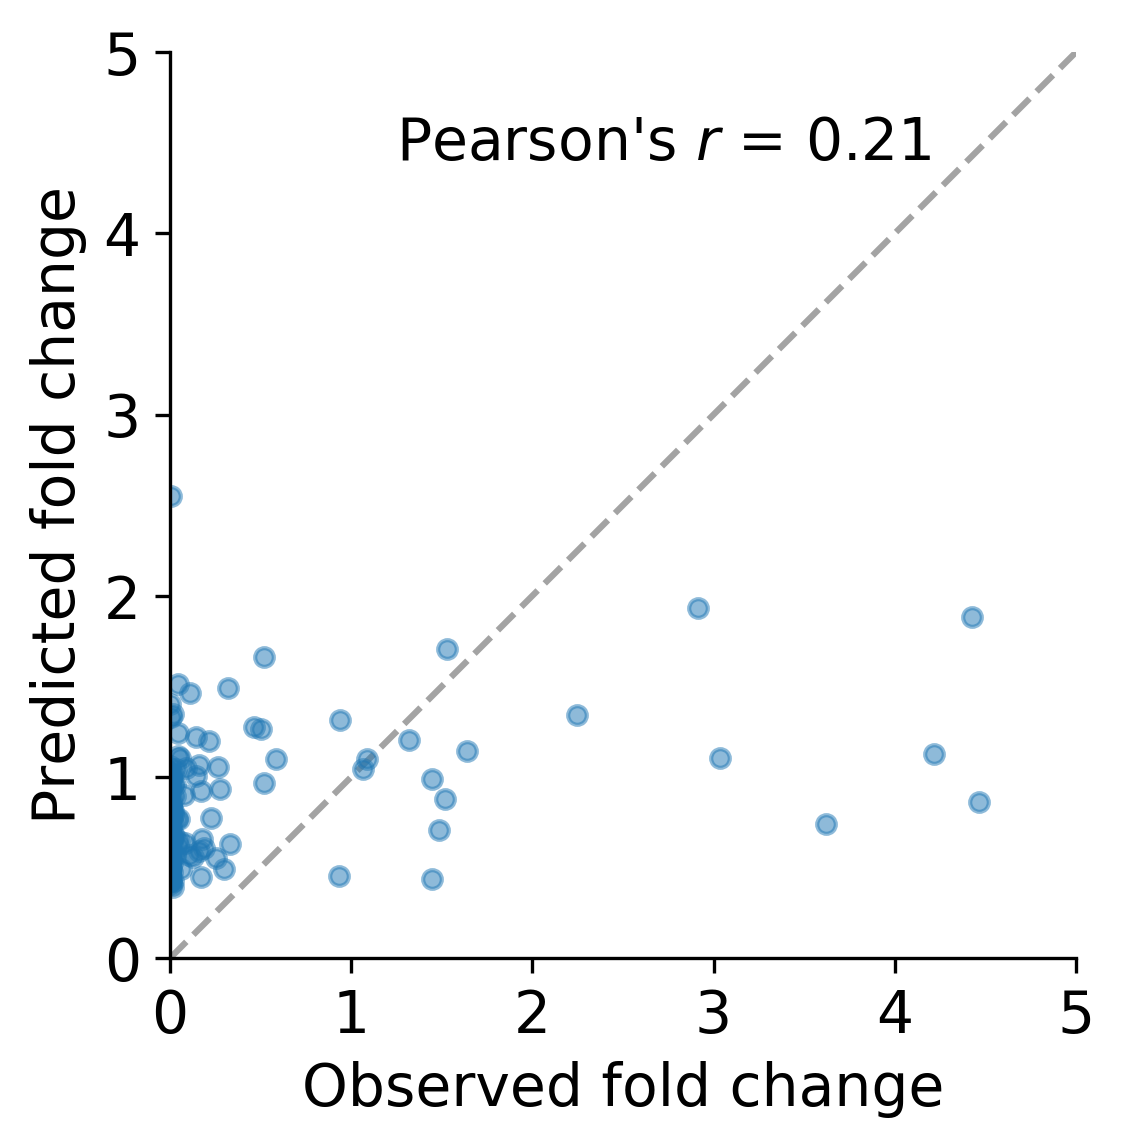

In [221]:
min_rate = 0
max_rate = 5
x = y = np.linspace(min_rate, max_rate, 100)
ax = test_df.plot(
    x="observed_growth_rate",
    y="predicted_growth_rate",
    kind="scatter",
    alpha=0.5,
    figsize=(4, 4)
)
ax.plot(x, y, "--", color="#999999", alpha=0.9, zorder=-10)
ax.text(
    0.25,
    0.9,
    "Pearson's $r$ = %.2f" % correlation,
    transform=ax.transAxes,
    horizontalalignment="left",
    verticalalignment="center"
)

ax.set_xlabel("Observed fold change")
ax.set_ylabel("Predicted fold change")
ax.set_aspect("equal")
ax.set_xlim(min_rate, max_rate)
ax.set_ylim(min_rate, max_rate)

In [222]:
accurate_clades = (
    ((test_df["observed_growth_rate"] > 1) & (test_df["predicted_growth_rate"] > 1)) |
    ((test_df["observed_growth_rate"] < 1) & (test_df["predicted_growth_rate"] < 1))
)

(0, 5)

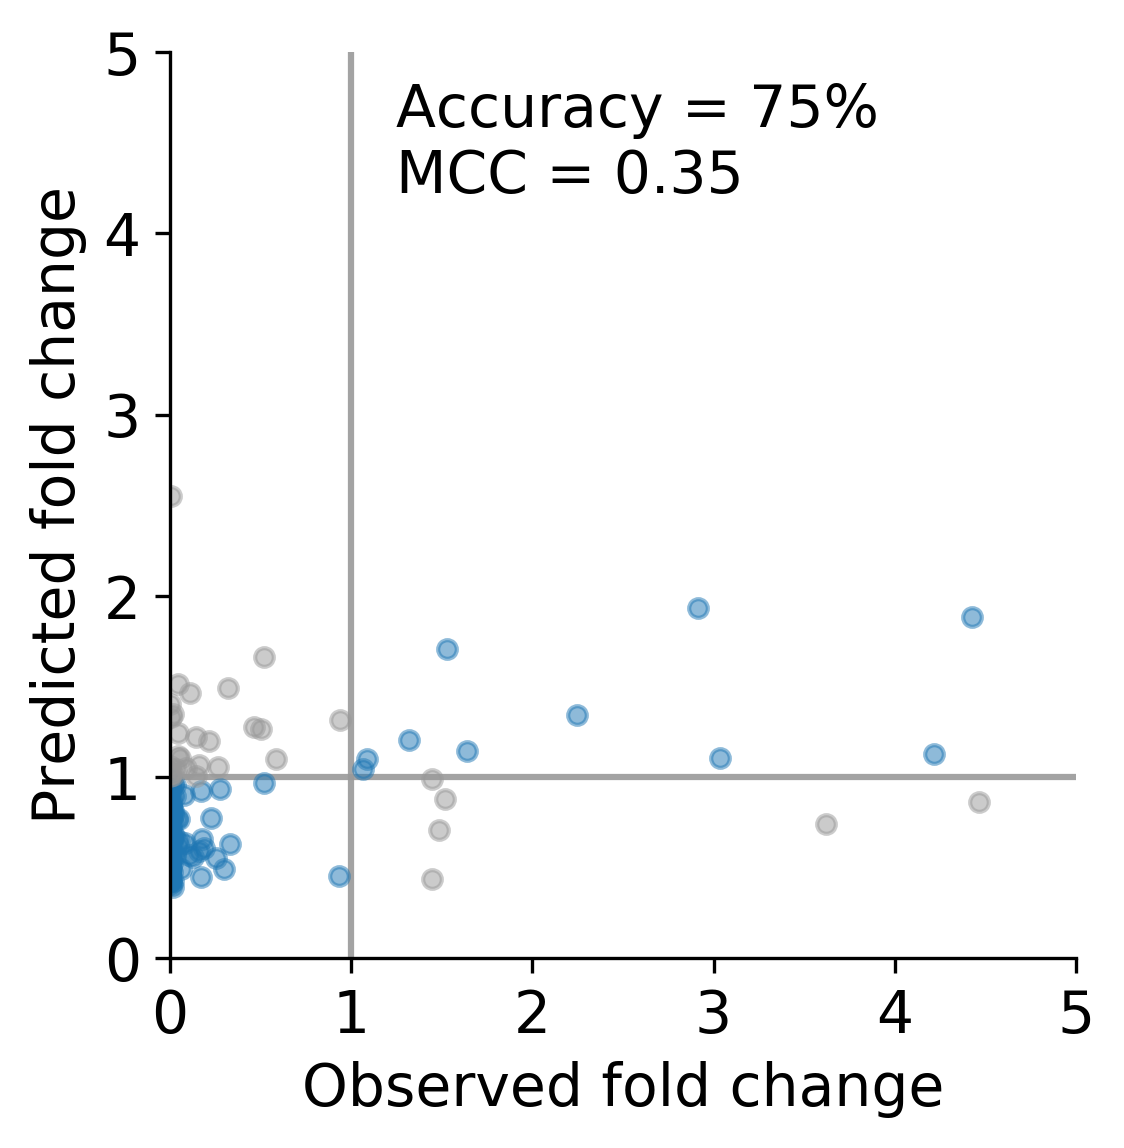

In [226]:
min_rate = 0
max_rate = 5
ax = test_df[accurate_clades].plot(
    x="observed_growth_rate",
    y="predicted_growth_rate",
    kind="scatter",
    alpha=0.5,
    figsize=(4, 4)
)
ax = test_df[~accurate_clades].plot(
    ax=ax,
    x="observed_growth_rate",
    y="predicted_growth_rate",
    kind="scatter",
    alpha=0.5,
    color="#999999"
)

ax.axhline(1, color="#999999", alpha=0.9, zorder=-10)
ax.axvline(1, color="#999999", alpha=0.9, zorder=-10)
ax.text(
    0.25,
    0.9,
    "Accuracy = %i%%\nMCC = %.2f" % (accuracy * 100, mcc),
    transform=ax.transAxes,
    horizontalalignment="left",
    verticalalignment="center"
)

ax.set_xlabel("Observed fold change")
ax.set_ylabel("Predicted fold change")
ax.set_aspect("equal")
ax.set_xlim(min_rate, max_rate)
ax.set_ylim(min_rate, max_rate)